In [74]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
import PIL.ImageOps as ImageOps
import PIL.Image as Image
from tqdm import tqdm

In [75]:
# Now we create the class names and store them in the labels.

class_names = ['aloevara',
                'nagfani',
               'neem',
               'tulsi'
               ]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [76]:
nb_classes

4

In [77]:
def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

## Data load and Preprocess

In [88]:
def load_data():
    
    datasets = ['imagedataset/train','imagedataset/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        #print(dataset)
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            #print(folder)
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = pre_process(img_path) 
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [89]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /kaggle/input/ayurvedic-plant-dataset/imagedataset/train


100%|██████████| 18/18 [00:00<00:00, 249.57it/s]


Loading /kaggle/input/ayurvedic-plant-dataset/imagedataset/test


100%|██████████| 4/4 [00:00<00:00, 228.77it/s]


In [80]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [81]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 57
Number of testing examples: 17
Each image is of size: (150, 150)


## Scaling the Data

In [82]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

## Visualization

In [83]:
def display_examples(class_names, images, labels):
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [84]:
# A function to simply display only one random image
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

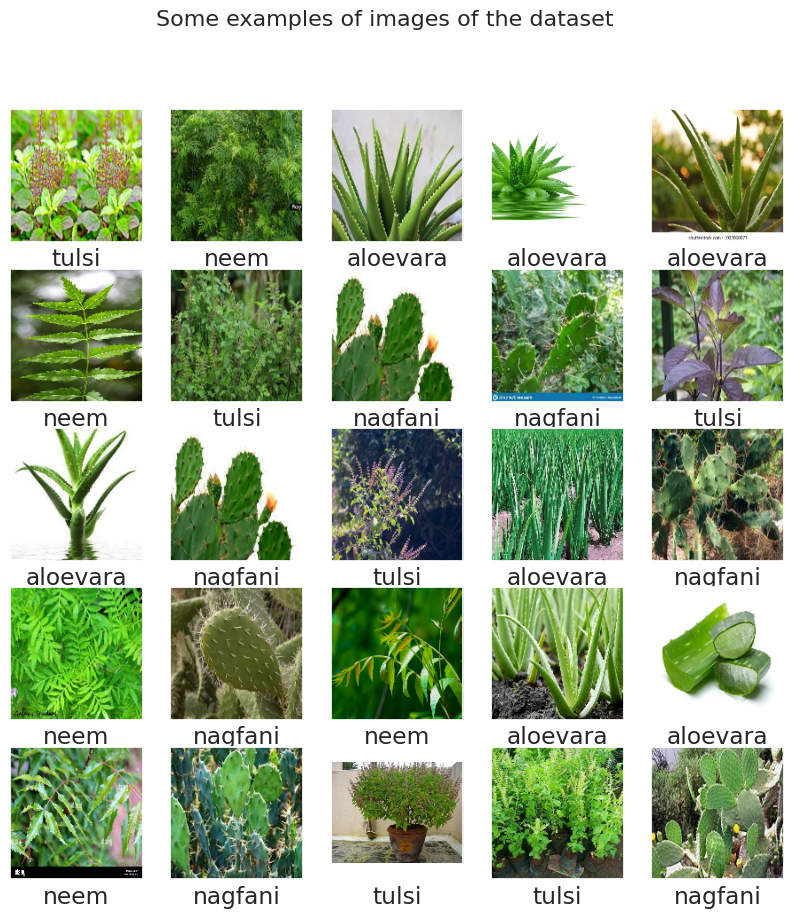

In [85]:
display_examples(class_names, train_images, train_labels)
